# Fashion MNIST

Link to dataset:
https://github.com/zalandoresearch/fashion-mnist




## Imports

In [1]:
import numpy as np
import pandas as pd
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../datasets/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../datasets/fashion', kind='t10k')

In [2]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))

print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


## Normalise and Reshape

In [3]:
import numpy as np

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
label_dictionnary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def true_label(x):
    return label_dictionnary[x]

Sneaker


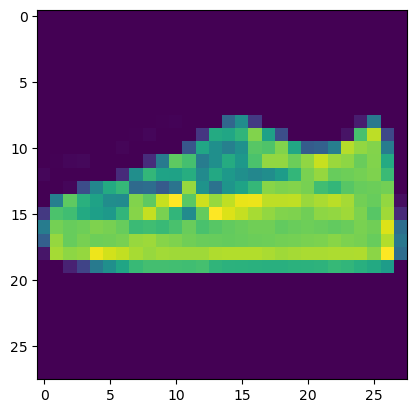

In [5]:
import matplotlib.pyplot as plt

example = 108
g = plt.imshow(X_train.reshape(-1,28,28,1)[example][:,:,0])
print(true_label(y_train[example]))

## Support Vector Classification.

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# 9m 3.1s

SVC()

In [7]:
y_test_predict = svm_clf.predict(X_test)
y_test_predict

# 8m 46.8s

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

##### Save Model

In [8]:
import pickle
filename = 'svc_clf_fMNIST.sav'

In [9]:
pickle.dump(svm_clf, open(filename, 'wb'))

##### Load Model


In [10]:
svm_clf = pickle.load(open(filename, 'rb'))

In [11]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [12]:
result

0.8829

### Accuracy Metrics

#### Accuracy Measures

In [13]:
from sklearn import metrics

svc_f1 = metrics.f1_score(y_test, y_test_predict, average= "macro")
svc_accuracy = metrics.accuracy_score(y_test, y_test_predict)
svc_precision = metrics.precision_score(y_test, y_test_predict, average= "macro")
svc_recall = metrics.recall_score(y_test, y_test_predict, average= "macro")

print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Precision score: {}".format(svc_precision))
print("Recall Score: {}".format(svc_recall))

#print(metrics.classification_report(y_test, y_test_predict))

-----------------SVM Report---------------
F1 score: 0.8823731206842291
Accuracy score: 0.8829
Precision score: 0.8824157325777879
Recall Score: 0.8829


#### Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[857,   0,  16,  28,   3,   2,  85,   0,   9,   0],
       [  4, 962,   2,  25,   3,   0,   4,   0,   0,   0],
       [ 11,   2, 816,  16,  88,   0,  65,   0,   2,   0],
       [ 27,   3,  11, 890,  33,   0,  32,   0,   4,   0],
       [  1,   1,  87,  32, 815,   0,  61,   0,   3,   0],
       [  0,   0,   0,   1,   0, 951,   0,  33,   1,  14],
       [135,   1, 103,  27,  68,   0, 655,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 955,   0,  24],
       [  3,   1,   1,   5,   2,   2,   4,   5, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  37,   0, 951]], dtype=int64)

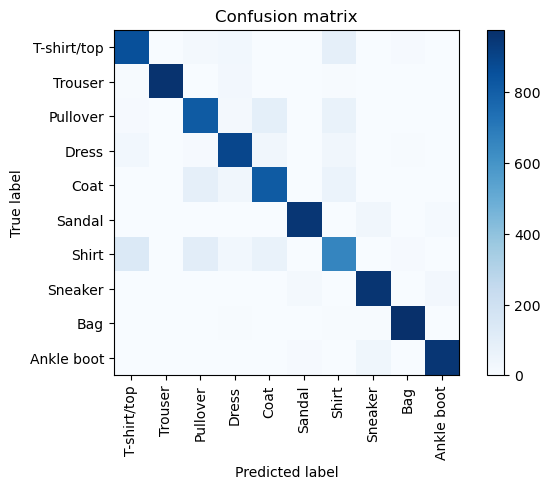

In [15]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(conf_matrix, labelNames)
plt.show()